## 1. Tutorial

### Biblioteka numpy

Numpy jest biblioteką do obliczeń numerycznych. Szczególnie dobrze nadaje się do operacji na macierzach
i wektorach.

Zwróć uwagę:

- numpy działa w oparciu nie o wbudowany typ <b>list</b>, ale o specjalny typ macierzowy <b>array</b>.
- <b>array</b> <a href="http://scipy-lectures.org/intro/numpy/array_object.html">umożliwia bardzo wygodne “krojenie” macierzy</a>

In [62]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [63]:
x = [1, 2, 3, 4, 5, 6]
v = np.array(x)
v

array([1, 2, 3, 4, 5, 6])

In [64]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [65]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

In [66]:
v.shape

(6,)

In [67]:
M.shape

(2, 2)

In [68]:
M.dtype

dtype('int32')

In [69]:
np.random.rand(5, 3)

array([[0.72013194, 0.34894998, 0.37464595],
       [0.76723472, 0.22297672, 0.13617793],
       [0.05490051, 0.81501378, 0.70802659],
       [0.8879265 , 0.83599869, 0.62350657],
       [0.78264668, 0.53396574, 0.62389639]])

In [70]:
M = np.array([[1, 2, 3], [4, 5, 6]])
N = np.array([[1, 1, 1], [2, 2, 2]])
print(N)
print(M)

[[1 1 1]
 [2 2 2]]
[[1 2 3]
 [4 5 6]]


In [71]:
M + N

array([[2, 3, 4],
       [6, 7, 8]])

In [72]:
5 * M

array([[ 5, 10, 15],
       [20, 25, 30]])

In [73]:
M * N

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [74]:
# Mnożenie macierzy
try:
  M.dot(N)
except ValueError as e:
  pass

In [75]:
# Transpozycja
M.dot(N.T)

array([[ 6, 12],
       [15, 30]])

In [76]:
# Generowanie rownych odstepow
v = np.linspace(0, 10, 21)
v

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

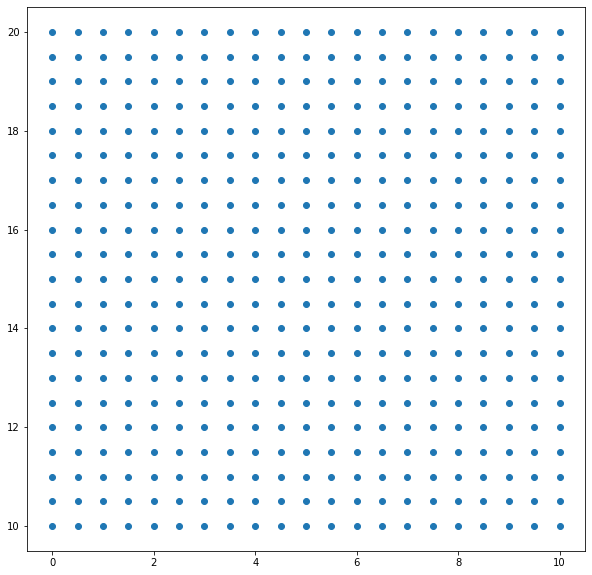

In [77]:
# Generowanie macierzy współrzędnych
x = np.linspace(0, 10, 21)
y = np.linspace(10, 20, 21)
xx, yy = np.meshgrid(x, y)
plt.scatter(xx, yy)

In [78]:
np.sin(v)

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112,
       -0.54402111])

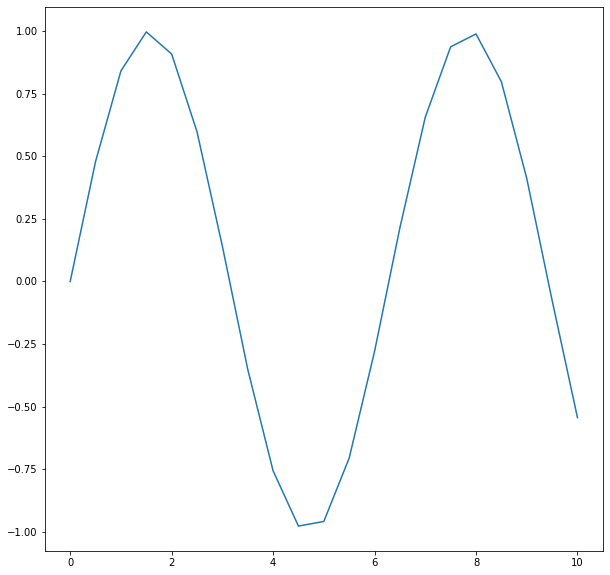

In [79]:
plt.plot(v, np.sin(v))
plt.show()

In [80]:
M = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [81]:
# Krojenie macierzy
# Wszystkie wiersze razy 2ga (trzecia) kolumna
M[:, 2]

array([ 3,  7, 11, 15])

In [82]:
M[2, 1:3]

array([10, 11])

In [83]:
M[1:3, 2:4]

array([[ 7,  8],
       [11, 12]])

In [84]:
M[::2, :]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [85]:
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [86]:
M[::2, ::2] = 0
M

array([[ 0,  2,  0,  4],
       [ 5,  6,  7,  8],
       [ 0, 10,  0, 12],
       [13, 14, 15, 16]])

### Kolory, obrazy

In [87]:
def gen_img(n=9, start=-1.5, end=1.5, size=2000, is_first: bool = False):
  # Inicjalizacja danych
  x = np.linspace(start, end, size)
  y = np.linspace(start, end, size)
  xx, yy = np.meshgrid(x, y)
  Z = xx + yy * 1j  # Tworzymy macierz wartości zespolonych
  first = lambda Z: ((n - 1) / n) * Z + (1 / n) * (1 / (Z ** (n - 1)))
  second = lambda Z: ((n ** 2 - 3 / n ** 2) / n ** 2) * Z - 3 / n ** 2 + (1 / n ** 3) * (1 / (Z ** (n - 1)))

  for i in range(50):
    Z = (first if is_first else second)(Z)

  # Argument liczby zespolonej
  img = np.angle(Z)
  # Normalizacja do zakresu 0-255
  return 255 * (img - np.min(img)) / np.ptp(img)

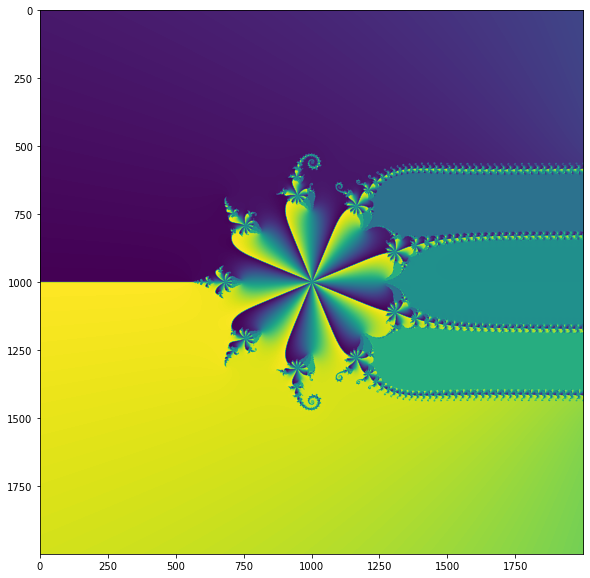

In [88]:
# Można również przetestować funkcję dla innych n niż domyślne
img = gen_img()
plt.imshow(img)

In [89]:
# Funkcja zwraca dwuwymiarową tablicę wartości z zakresu 0-255
print(img)

[[ 16.97899147  16.985697    16.99240752 ...  53.77318975  53.811433
   53.84969385]
 [ 16.96391335  16.97061438  16.9773204  ...  53.76364207  53.80191947
   53.84021453]
 [ 16.94883024  16.95552676  16.96222828 ...  53.75407668  53.79238829
   53.83071761]
 ...
 [238.05116976 238.04447324 238.03777172 ... 201.24592332 201.20761171
  201.16928239]
 [238.03608665 238.02938562 238.0226796  ... 201.23635793 201.19808053
  201.15978547]
 [238.02100853 238.014303   238.00759248 ... 201.22681025 201.188567
  201.15030615]]


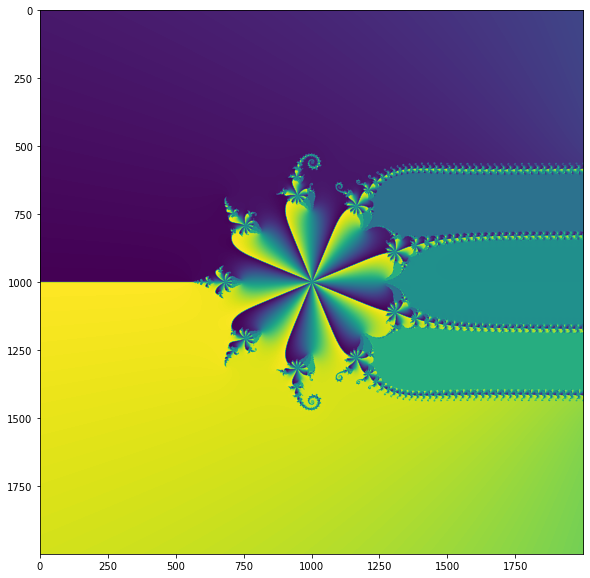

In [90]:
# Wyświetlanie numpy array jako obrazu
plt.imshow(img)

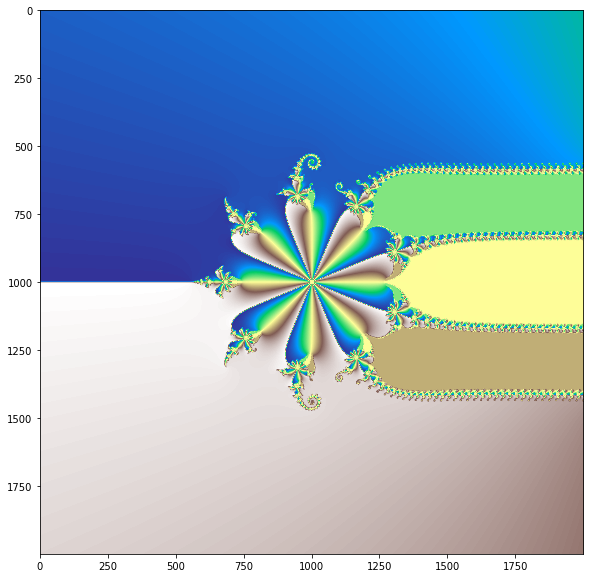

In [91]:
# Zmiana mapy kolorów
plt.imshow(img, cmap="terrain")

<a href="https://www.cs.put.poznan.pl/rsusmaga/Dydaktyka/TO--2017/TO-cz-1-wykladu-13-sent.pdf">Źródło</a> kodu generującego obraz wraz z objaśnieniem.

### Biblioteka skimage

In [92]:
from skimage import io
from skimage import color

# Wczytywanie obrazu
img = io.imread('resources/lab-2/images/pic.jpg')

In [93]:
# Obraz RGB
print(img[50:54, 50:54])

[[[140 161 162]
  [138 159 160]
  [150 171 172]
  [161 182 183]]

 [[190 211 212]
  [209 230 231]
  [214 235 236]
  [175 196 197]]

 [[193 217 217]
  [138 162 162]
  [147 171 171]
  [153 177 177]]

 [[118 142 142]
  [ 87 111 111]
  [147 171 171]
  [124 148 148]]]


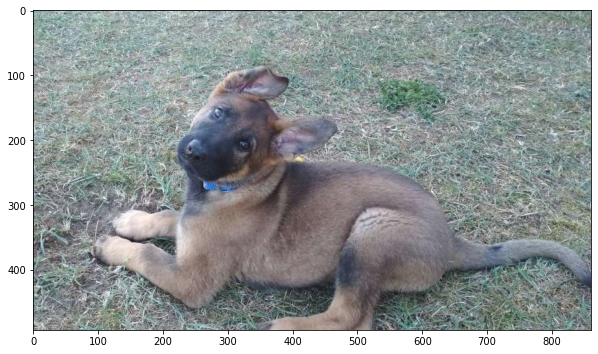

In [94]:
plt.imshow(img)

In [95]:
# Wczytywanie z konwersją RGB -> skala szarości
img_bw = io.imread('resources/lab-2/images/pic.jpg', as_gray=True)

In [96]:
print(img_bw[50:54, 50:54])

[[0.61415529 0.60631216 0.65337098 0.69650824]
 [0.81023373 0.88474353 0.90435137 0.7514102 ]
 [0.83098039 0.61529412 0.65058824 0.67411765]
 [0.53686275 0.41529412 0.65058824 0.56039216]]


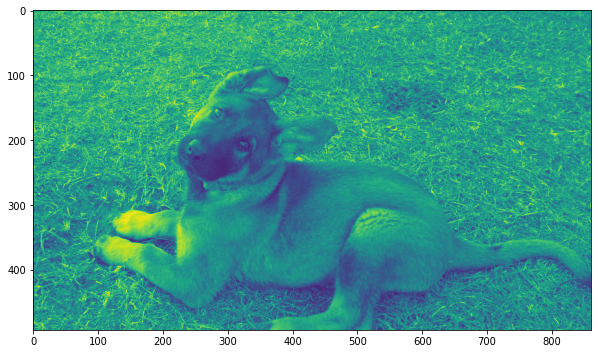

In [97]:
plt.imshow(img_bw)

In [98]:
# Konwersja z RGB na skalę szarości
img_bw2 = color.rgb2gray(img)

### Dźwięk

In [99]:
from playsound import playsound
from scipy.io import wavfile

In [100]:
# Odtwarzanie dźwięku
playsound('resources/lab-2/sounds/err.wav')

In [101]:
# Wczytywanie pliku wav
# samplerate to częstotliwość próbkowania, data to próbki
samplerate, data = wavfile.read('resources/lab-2/sounds/err.wav')

In [102]:
# Zapisanie pliku wav
wavfile.write("resources/lab-2/sounds/test.wav", samplerate, data)

In [103]:
# Sprawdzenie liczby próbek i liczby kanałów
np.shape(data)

(42880, 2)

## 2. Zadania

### Biblioteka numpy

1. Utwórz macierz 2D:

[ 1, 3, 1, 2]<br>
[ 1, 2, 5, 8]<br>
[ 3, 1, 2, 9]<br>
[ 5, 4, 2, 1]<br>

In [104]:
r_1: np.array = np.array((1, 3, 1, 2))
r_2: np.array = np.array((1, 2, 5, 8))
r_3: np.array = np.array((3, 1, 2, 9))
r_4: np.array = np.array((5, 4, 2, 1))

arr_1: np.ndarray = np.array((r_1, r_2, r_3, r_4))
arr_1

array([[1, 3, 1, 2],
       [1, 2, 5, 8],
       [3, 1, 2, 9],
       [5, 4, 2, 1]])

2. Wytnij z utworzonej macierzy pierwszy i ostatni wiersz oraz ostatnią kolumnę.

In [105]:
arr_1 = np.delete(arr_1, [0, -1], 0)
arr_1 = np.delete(arr_1, [-1], 1)
arr_1

array([[1, 2, 5],
       [3, 1, 2]])

3. Utwórz macierz 2D:

[ 2, 3, 1]<br>
[ 5, 1, 3]<br>

In [106]:
r_1: np.ndarray = np.array((2, 3, 1))
r_2: np.ndarray = np.array((5, 1, 3))

arr_2: np.ndarray = np.array((r_1, r_2))
arr_2

array([[2, 3, 1],
       [5, 1, 3]])

4. Dokonaj transpozycji powyższej macierzy.

In [107]:
arr_2 = arr_2.T
arr_2

array([[2, 5],
       [3, 1],
       [1, 3]])

5. Oblicz iloczyn macierzy z punktu 2 i 4.

In [108]:
arr_1.dot(arr_2)

array([[13, 22],
       [11, 22]])

6. Stwórz wykres funkcji sin w przedziale od −π do π z liczbą punktów równą: 3, 10, 100.

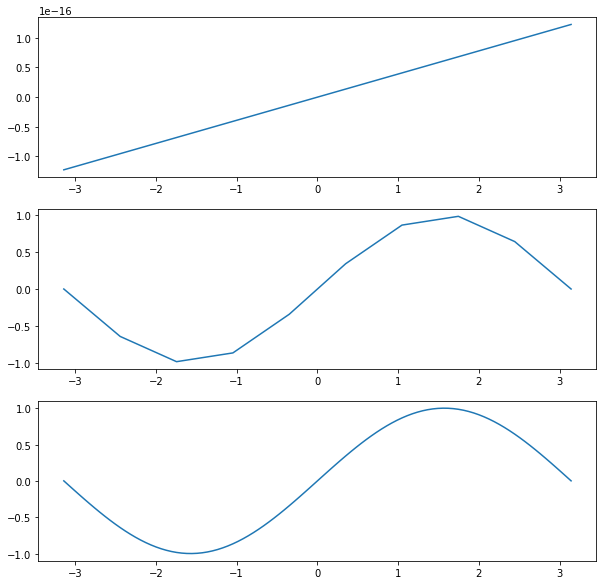

In [109]:
from typing import *
import matplotlib.pyplot as pp

nums = (3, 10, 100)
points: Dict[int, tuple] = {num: np.linspace(-np.pi, np.pi, num=num) for num in nums}
sins: Dict[int, tuple] = {num: np.sin(points[num]) for num in nums}

plot_info: Tuple[pp.Figure, Tuple[pp.Axes, pp.Axes, pp.Axes]] = pp.subplots(3)
(fig, (axes)) = plot_info

for (num, axis) in zip(nums, axes):
  axis.plot(points[num], sins[num])

pp.show()

### Obrazy

1. Przetestuj różne mapy kolorów korzystając z obrazu wygenerowanego przy użyciu funkcji gen_img()

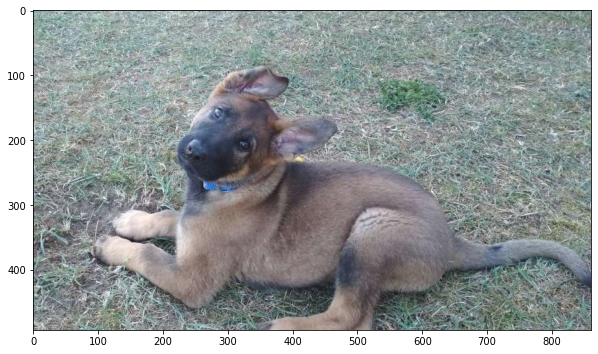

In [110]:
pp.imshow(img, cmap='PRGn')


2. Wczytaj obraz z pliku "pic.jpg" i sprawdź wymiary tablicy

In [111]:
import cv2

img: np.ndarray = cv2.imread('resources/lab-2/images/pic.jpg')
img.shape


(493, 861, 3)

3. Przekonwertuj obraz do skali szarości i sprawdź wymiary tablicy

In [112]:
img = cv2.cvtColor(img, cv2.COLOR_RGBA2GRAY)
img.shape

(493, 861)

4. Wyświetl obraz w skali szarości (poszukaj odpowiedniej mapy kolorów)

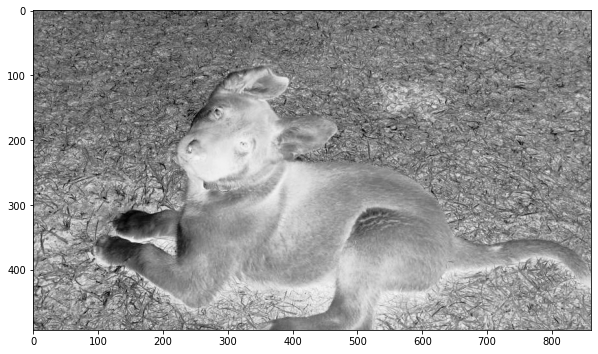

In [113]:
pp.imshow(img, cmap='Greys')

5. Wykadruj obraz tak aby na obrazie pozostała tylko głowa

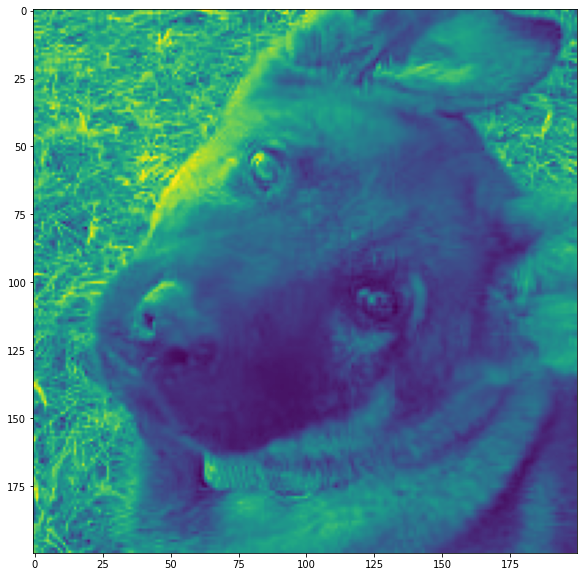

In [114]:
pp.imshow(img[100:300, 200:400])

6. Dokonaj inwersji kolorów (stwórz "negatyw" obrazu)

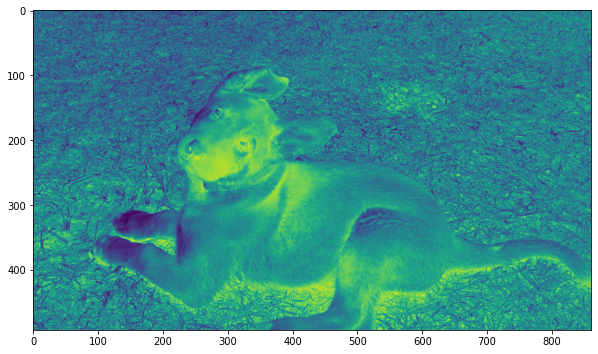

In [115]:
pp.imshow(~img)

7. Korzystając z numpy wygeneruj poniższy obraz

![title](resources/lab-2/images/gradient.png)

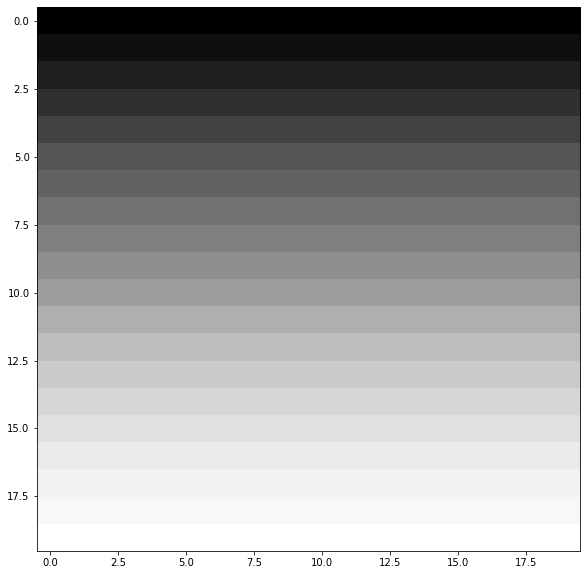

In [116]:
def create_gradient(line_count: int, line_height: int) -> np.ndarray:
  dimension: Tuple[int, int] = (line_count * line_height, line_count * line_height)
  image: np.ndarray = np.zeros(dimension)

  colors: np.ndarray = np.linspace(255, 0, line_count)
  for i in range(line_count):
    image[line_height * i:line_height + line_height * i] = colors[i]
  return image

pp.imshow(create_gradient(20, 1), cmap='Greys')

8. Korzystając z numpy wygeneruj poniższy obraz

![title](resources/lab-2/images/goal.png)

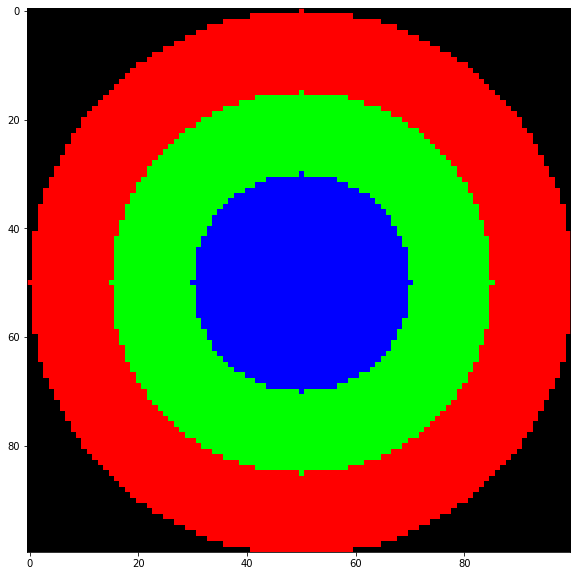

In [117]:
Image = np.ndarray
Color = Tuple[float, float, float]
Dimension = Tuple[int, int, int]
Step = Tuple[int, Color]

red: Color = (255, 0, 0)
green: Color = (0, 255, 0)
blue: Color = (0, 0, 255)
black: Color = (0, 0, 0)

def foreach(iterable, predicate):
  [*map(predicate, iterable)]

def create_gradient_in_radius(diameter: int, steps: Tuple[Step, ...]) -> Image:
  dimension: Dimension = (diameter, diameter, 3)
  image: Image = np.zeros(dimension, np.uint8)
  radius: int = diameter // 2

  def find_distance(i: int, j: int) -> int:
    return np.square(i - radius) + np.square(j - radius)

  def apply_color(step: Step):
    (s, c) = step
    image[distances <= np.square(s)] = c

  (xx, yy) = np.mgrid[:diameter, :diameter]
  distances = find_distance(xx, yy)

  foreach(steps, apply_color)
  return image

steps: Tuple[Step, ...] = ((50, red), (35, green), (20, blue))
pp.imshow(create_gradient_in_radius(100, steps))

### Dźwięki

1. Wczytaj pllik "err.wav"

In [118]:
data: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/err.wav')
(hz, sound) = data

2. Wyświetl wymiary tablicy przechowującej plik

In [119]:
print(hz, sound.shape)

44100 (42880, 2)


3. Stwórz wykres przebiegu sygnału w czasie

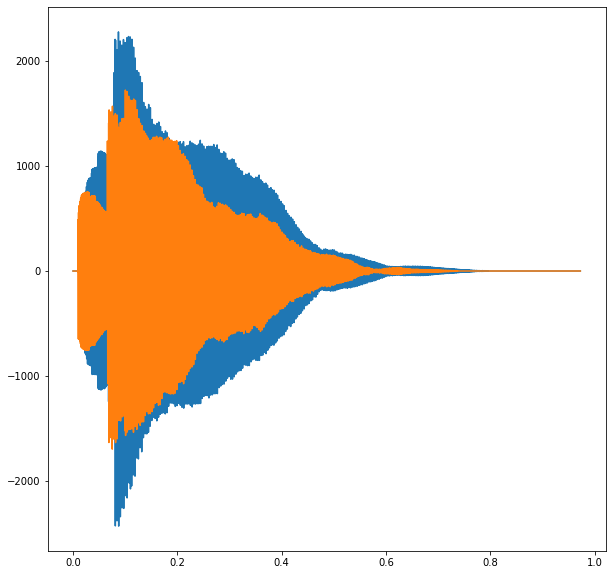

In [120]:
np.linspace(0, sound.shape[0] / hz, sound.shape[0])
plt.plot(np.linspace(0, sound.shape[0] / hz, sound.shape[0]), sound)

4. Wczytaj plik "leto.wav"

In [121]:
# (hz, sound) = wavfile.read('resources/lab-2/sounds/leto.wav')

C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_4492/2621503662.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  (hz, sound) = wavfile.read('resources/lab-2/sounds/leto.wav')


5. Zastosuj efekt fade in (stopniowe zgłaśnianie) przemnażając próbki przez odpowiednie wagi i zapisując efekt do pliku .wav. Pamiętaj że nagranie ma dwie ścieżki.

C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_4492/2276214872.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  filedata: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/leto.wav')


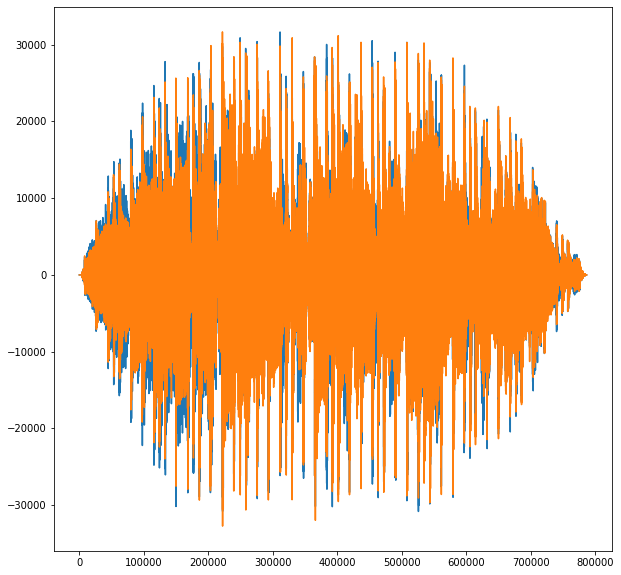

In [181]:
filedata: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/leto.wav')
(hz, sound) = filedata

ease_out = lambda x: 1 - (1 - x) * (1 - x)

sound[:200000] = [sound[i] * n for (i, n) in enumerate(ease_out(np.linspace(0, 1, 200000)))]
sound[-300000:] = [sound[-300000 + i] * n for (i, n) in enumerate(ease_out(np.linspace(1, 0, 300000)))]

plt.plot(sound)

6. Powtórz poprzednie polecenie, tym razem stosując fade-in logarytmiczny. Jaka jest różnica w porównaniu do poprzedniego podejścia? Dlaczego tak się dzieje? 

C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_4492/362420360.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  filedata: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/leto.wav')
C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_4492/362420360.py:6: RuntimeWarning: divide by zero encountered in log
  sound[:200000] = [sound[i] * n for (i,n) in enumerate(np.log(np.linspace(1,0, 200000)))]
C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_4492/362420360.py:7: RuntimeWarning: divide by zero encountered in log
  sound[-200000:] = [sound[-200000+i] * n for (i,n) in enumerate(np.log(np.linspace(0,1, 200000)))]


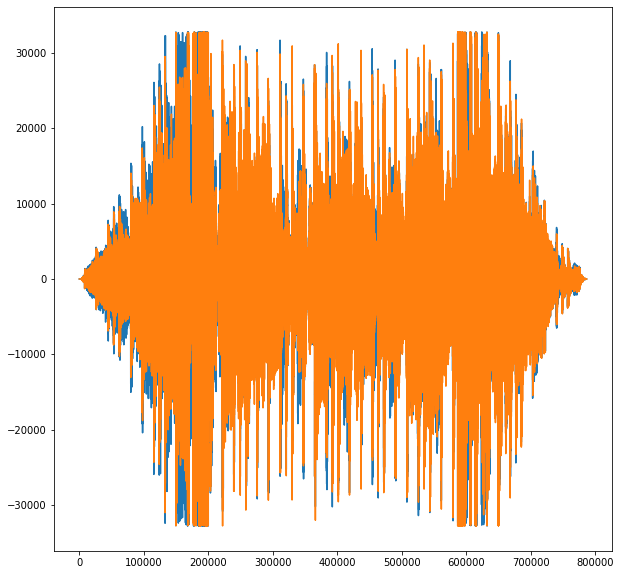

In [188]:
filedata: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/leto.wav')
(hz, sound) = filedata

ease_out = lambda x: 1 - (1 - x) * (1 - x)

sound[:200000] = [sound[i] * n for (i, n) in enumerate(np.log(np.linspace(1, 0, 200000)))]
sound[-200000:] = [sound[-200000 + i] * n for (i, n) in enumerate(np.log(np.linspace(0, 1, 200000)))]

plt.plot(sound)

7. Odejmij od siebie wartości próbek w obu kanałach, podziel wynik przez dwa i zapisz do pliku .wav. Pamiętaj żeby przed zapisem do pliku przekonwertować wynik tej operacji na <b>int</b> korzystając z <b>astype('int16')</b>. Co się stało z nagraniem? Jaka jest tego przyczyna?

C:\Users\HOUOUI~1\AppData\Local\Temp/ipykernel_4492/2641840592.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  filedata: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/leto.wav')


TypeError: write() argument must be str, not bytes

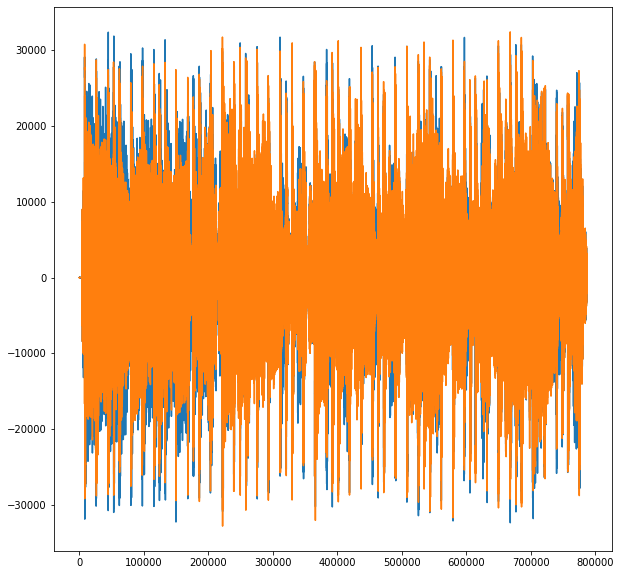

In [202]:
filedata: Tuple[int, np.ndarray] = wavfile.read('resources/lab-2/sounds/leto.wav')

(hz, sound) = filedata
filedata = ((sound[:, 0] - sound[:, 1]) / 2).astype('int16')
plt.plot(sound)
  
with open('any.wav', 'w+') as outfile:
  wavfile.write(outfile, hz, filedata)